<a href="https://colab.research.google.com/github/kiyuyeon/Ml_Dl/blob/master/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D(%EB%B6%80%EB%A1%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

fatal: destination path 'data' already exists and is not an empty directory.


In [23]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
print(X.head())
print(y.head())

   pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
0         6     148        72         35        0  33.6     0.627   50
1         1      85        66         29        0  26.6     0.351   31
2         8     183        64          0        0  23.3     0.672   32
3         1      89        66         23       94  28.1     0.167   21
4         0     137        40         35      168  43.1     2.288   33
0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64


In [25]:
X = df.iloc[:,0:8]
y=df.iloc[:,8]

ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
scaled_X.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


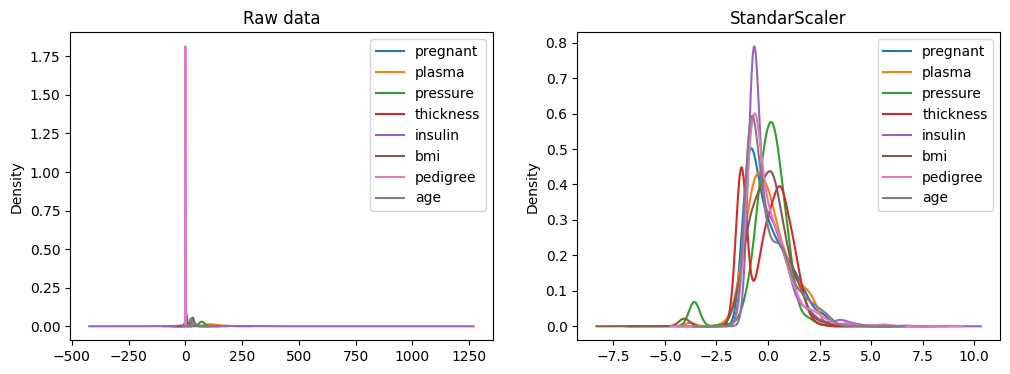

In [26]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
X.plot(kind='kde',title='Raw data',ax=ax[0])
scaled_X.plot(kind='kde',title='StandarScaler',ax=ax[1])
plt.show()

X_train, X_test , y_train,y_test = train_test_split(scaled_X,y,test_size=0.25,random_state=0)

#Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10,shuffle=True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))


Accuracy : 66.99 %
Standard Deviation : 4.74 %


#Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
skf= StratifiedKFold(n_splits= 10,shuffle = True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.27 %
Standard Deviation : 6.39 %


#Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
skf= StratifiedKFold(n_splits= 10,shuffle = True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.53 %
Standard Deviation : 3.62 %


#K-bearest Neighbor

In [30]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
skf= StratifiedKFold(n_splits= 10,shuffle = True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 72.78 %
Standard Deviation : 5.71 %


#Ada Boost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
classifier =AdaBoostClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits = 10 , shuffle = True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 72.20 %
Standard Deviation : 4.43 %


#Quadratic Discriminant Analysis

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits = 10,shuffle = True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 72.02 %
Standard Deviation : 6.23 %


#Support Vector Machine

In [36]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits = 10,shuffle = True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.70 %
Standard Deviation : 4.03 %


#Support Vector Machine - RBF kernel

In [38]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
skf = StratifiedKFold(n_splits = 10,shuffle = True)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 76.39 %
Standard Deviation : 4.96 %


#Voting

In [39]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel = 'linear')
classifier = VotingClassifier(estimators=[('ada',clf1),('rf',clf2),('rbf',clf3)])
classifier.fit(X_train,y_train)

skf = StratifiedKFold(n_splits=10,shuffle=True)

accuracies = cross_val_score(estimator=classifier,X = X_train, y = y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.16 %
Standard Deviation : 7.25 %


#Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'),n_estimators=10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

skf = StratifiedKFold(n_splits=10,shuffle=True)
accuracies = cross_val_score(estimator=classifier,X = X_train, y = y_train,cv=skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.88 %
Standard Deviation : 5.21 %


#Run Multiple Estimators

Mean accuracy of D_tree :67.38
Mean accuracy of RF :74.65
Mean accuracy of GNB :74.65
Mean accuracy of KNN :71.18
Mean accuracy of Ada :75.52
Mean accuracy of QDA :75.35
Mean accuracy of SVM_l :71.51
Mean accuracy of SVM_k :73.98
Mean accuracy of Voting :75.52
Mean accuracy of Bagging :76.07
Mean accuracy of XGBC :70.87


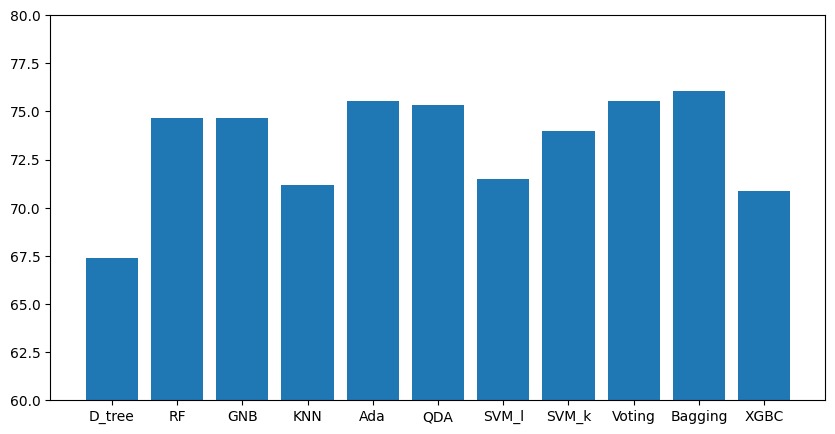

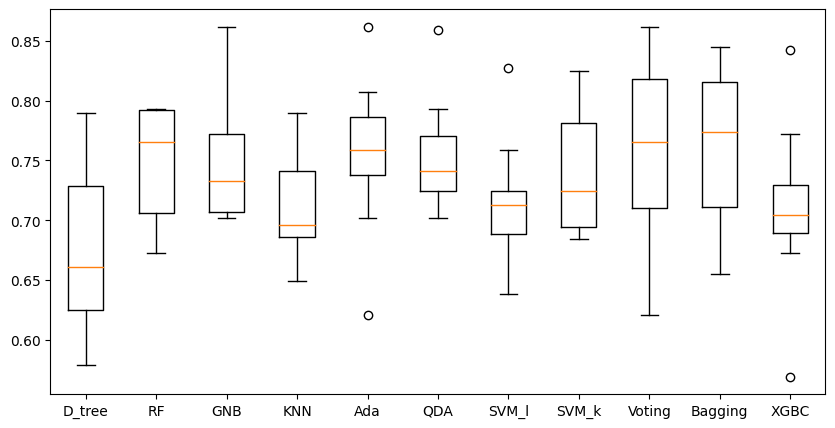

In [46]:
from xgboost import XGBClassifier


classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1',AdaBoostClassifier()),
                                            ('2',RandomForestClassifier()),
                                            ('3',SVC(kernel='linear'))]),
               BaggingClassifier(base_estimator=clf3,n_estimators=10,random_state=0),
                XGBClassifier()]


classifier_name = ['D_tree',
                   'RF',
                   'GNB',
                   'KNN',
                   'Ada',
                   'QDA',
                   'SVM_l',
                   'SVM_k',
                   'Voting',
                   'Bagging',
                   'XGBC']

modelaccuracies = []
modelmeans = []
modelnames= []

classifier_data = zip(classifier_name,classifiers)
for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10,shuffle=True)
  accuracies = cross_val_score(classifier,X=X_train,y=y_train,cv = skf)
  print('Mean accuracy of',classifier_name,':{:.2f}'.format(accuracies.mean()*100))
  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

plt.figure(figsize=(10,5))
plt.ylim(60,80)
plt.bar(modelnames,modelmeans);

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()